In [1]:
import os
import random
import torchvision
import torch
import matplotlib.pyplot as plt
from PIL import Image
from imutils import paths
from torch.utils.data import Dataset, DataLoader

# Import dataset

In [2]:
class FaceMaskDataset(Dataset):
    """Face Mask Dataset - contains images of people with and without masks"""

    def __init__(self, root_dir, transform=None):
        """
        Args:
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.transform = transform
        self.paths = list(paths.list_images(root_dir))
        self.classes = 2

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        image = Image.open(self.paths[idx]).convert("RGB")
        label_name = self.paths[idx].split(os.path.sep)[-2]
        
        label = 1 if label_name == "with_mask" else 0

        if self.transform:
            image = self.transform(image)
            
        sample = {'image': image, 'label': label}

        return sample

Image number: 2707
Image shape: torch.Size([3, 224, 224])
Label: 1
Image number: 2548
Image shape: torch.Size([3, 224, 224])
Label: 1
Image number: 2741
Image shape: torch.Size([3, 224, 224])
Label: 1
Image number: 1261
Image shape: torch.Size([3, 224, 224])
Label: 0
Image number: 1059
Image shape: torch.Size([3, 224, 224])
Label: 0


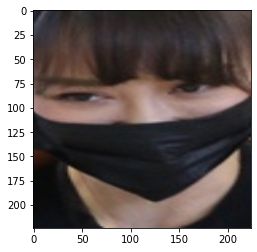

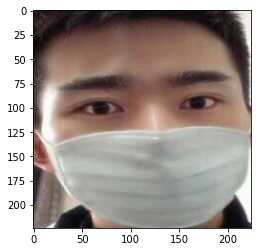

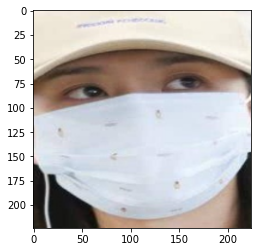

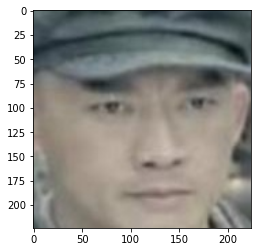

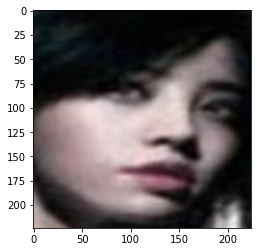

In [3]:
transform_to_tensor = torchvision.transforms.Compose([torchvision.transforms.Resize((224, 224)), torchvision.transforms.ToTensor(),])
face_mask_dataset = FaceMaskDataset(root_dir='dataset', transform=transform_to_tensor)

for i in random.sample(range(0, len(face_mask_dataset)), 5):
    sample = face_mask_dataset[i]

    print(f'Image number: {i}')
    print(f'Image shape: {sample["image"].shape}')
    print(f'Label: {sample["label"]}')

    fig =  plt.figure()
    plt.imshow(sample['image'].permute(1, 2, 0))

    if i == 20:
        break